In [1]:
#import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from node2vec import Node2Vec

In [2]:
G=nx.read_gpickle("CitationGraph.gpickle")

In [3]:
#Sort the graph (only made from -0.json file)
print(nx.info(G))
ccG = sorted(nx.connected_components(G), key = len, reverse=True)

Name: 
Type: Graph
Number of nodes: 1854174
Number of edges: 7570120
Average degree:   8.1655


### Small subgraph for quick implementation

In [33]:
i = 0
# first subgraph still has 1.7 million nodes so it's too big
for c in ccG:
  i += 1
  if i==2:
    second_subgroup = G.subgraph(c)
    break
nx.info(second_subgroup)

'Name: \nType: Graph\nNumber of nodes: 48\nNumber of edges: 100\nAverage degree:   4.1667'

In [34]:
nx.write_gpickle(second_subgroup,"subgroupgraph.gpickle")

## Start here to run test file

In [35]:
subG = nx.read_gpickle("subgroupgraph.gpickle")

In [15]:
node2vec = Node2Vec(subG, dimensions=14, walk_length=5, num_walks=100, workers=2)

Computing transition probabilities: 100%|██████████| 48/48 [00:00<00:00, 1584.55it/s]


In [16]:
model = node2vec.fit(window=10, min_count=1)

In [36]:
subG.nodes

NodeView(('11f0d114-cde0-4575-8277-333a3b2b20fb', '38ea79aa-2ff8-4990-8587-2ffbf2d64ea5', 'afe42d85-0a1d-4aaa-aff6-f1970f3bb142', '9fde4b76-b067-4174-945e-847cac68c537', '68c68b1f-98ec-4786-8843-bb066aa08fe6', '46125870-6c95-47ae-910f-cf3925da574a', 'a824fb11-b250-485f-a506-353801576e69', '41192f5c-f633-4ea1-a442-5fde01399eee', '64109b17-58ad-4518-aab1-fe88b20bf738', '3bcbe676-5116-4823-9c5e-d7250d0e1694', 'fd2a3c07-a05e-4d8a-9da0-69439b5248d4', '0a4f9084-3949-44ca-8926-8665b0d18be5', 'd8c4c52c-90be-4149-9112-5893bb2dd00c', '36132d85-1c0f-40c3-9ce4-af8022f6c951', '1ef87ad2-6721-4aee-85b1-8b4b779248bd', '8c96dfdc-c2a4-45d1-8dbd-3feda3cab74e', '3eb28440-e63f-4215-b080-f7e2daed503b', '96e67a09-58e2-4047-b657-61c0039c419a', '944392e7-4fcd-470d-ad6f-4ea17a3f2b75', '9a71d3fa-9126-4b10-a23b-f986ce3440e5', '88d16346-5ef4-44b0-a5bc-e284637c4544', 'b1d7f89e-6ac8-481c-946d-93c54deff86a', 'b5fdb545-bbb6-4e10-bd47-c9650c161d35', '3c8b1bf3-8686-4c03-b228-1ba8f118e6c8', 'b449b671-ccde-415d-916d-28b06

In [39]:
dblp = pd.read_csv('titles_dblp_v10.csv')

### Pull up similar articles :)

In [63]:
for node, _ in model.most_similar('d8c4c52c-90be-4149-9112-5893bb2dd00c'):
    if list(dblp[dblp['id'] == node].title) != []:
        print(list(dblp[dblp['id'] == node].title))
    else:
        print(node)

/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


944392e7-4fcd-470d-ad6f-4ea17a3f2b75
['Generalized composition operators from F(p,q,s) spaces to Bloch-type spaces']
['Bounded superposition operators between weighted Banach spaces of analytic functions']
9fde4b76-b067-4174-945e-847cac68c537
cdfee34f-3698-4687-ac70-9c52cd78b786
b666180f-1d61-42b2-a826-a1a4e2b377de
9a71d3fa-9126-4b10-a23b-f986ce3440e5
8b25a972-b0be-4a0b-a483-1b9ad9c55f06
de4bad95-84ec-4ec5-a119-b1ab3c1d3f5f
e23c7ad4-e94e-428b-a174-b37dc1b2e485


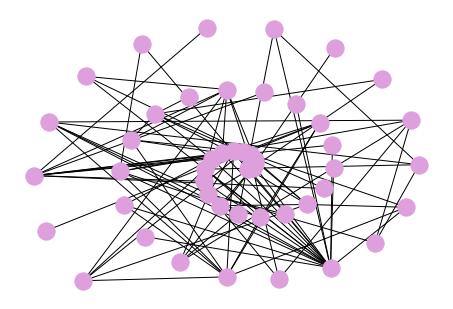

In [32]:
#plot of the subgraph
nx.draw(second_largest, pos=nx.spiral_layout(second_largest), node_color='#DDA0DD')

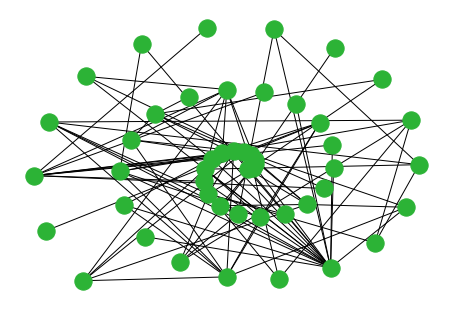

In [66]:
nx.draw(second_largest, pos=nx.spiral_layout(second_largest), node_color='#2cb336')